In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [2]:
df=pd.read_csv("data/stud.csv",index_col=False)

In [66]:
df.columns

Index(['Unnamed: 0', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

In [67]:
X=df.drop(columns=['math_score','Unnamed: 0','total_score','average_score'],axis=1)
Y=df['math_score']

In [68]:
cat_features=[cols for cols in X.columns if X[cols].dtype=='O']
num_features=[cols for cols in X.columns if X[cols].dtype !='O']
#ALTERNATIVE METHOD FOR ABOVE LINES :
# num_features = X.select_dtypes(exclude="object").columns
# cat_features = X.select_dtypes(include="object").columns

In [69]:
cat_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [70]:
num_features

['reading_score', 'writing_score']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)     
    ]
)

In [73]:
X=preprocessor.fit_transform(X)

In [74]:
X.shape

(1000, 19)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [76]:
X_train.shape, X_test.shape

((750, 19), (250, 19))

In [77]:

def evaluation(test,predicted):
    mae=mean_absolute_error(test,predicted)
    mse=mean_squared_error(test,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(test,predicted)
    return mae,mse,rmse,r2_square

In [78]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [79]:
print(list(models))

['Linear Regression', 'Lasso', 'Ridge', 'K-Neighbors Regressor', 'Decision Tree', 'Random Forest Regressor', 'XGBRegressor', 'CatBoosting Regressor', 'AdaBoost Regressor']


In [80]:
model_list=[]
r2_list=[]

for i in range( len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,Y_train)
    
    Y_train_predict=model.predict(X_train)
    Y_test_predict=model.predict(X_test)
    
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2_square=evaluation(Y_train,Y_train_predict)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2_square=evaluation(Y_test,Y_test_predict)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2_square))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2_square))
    r2_list.append(model_test_r2_square)
    
    print('\n')
    
    
    
    
    
    

Linear Regression
Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2972
- Mean Absolute Error: 4.2383
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4825
- Mean Absolute Error: 4.3379
- R2 Score: 0.8778


Lasso
Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5515
- Mean Absolute Error: 5.1837
- R2 Score: 0.8077
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6541
- Mean Absolute Error: 5.2217
- R2 Score: 0.8200


Ridge
Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2976
- Mean Absolute Error: 4.2368
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4788
- Mean Absolute Error: 4.3354
- R2 Score: 0.8780


K-Neighbors Regressor
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7920
- Mean Absolute Erro

In [81]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Lasso,0.877990
0,Linear Regression,0.877824
7,K-Neighbors Regressor,0.854830
8,Decision Tree,0.844794
5,Ridge,0.843887
6,K-Neighbors Regressor,0.836290
1,Linear Regression,0.820027
3,Lasso,0.793207
4,Ridge,0.750057


#### LINEAR REGRESSION

In [82]:
lin_model= LinearRegression( fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print(" Accuracy of the model is %.2f" %score)


 Accuracy of the model is 87.78


Text(0, 0.5, 'Predicted')

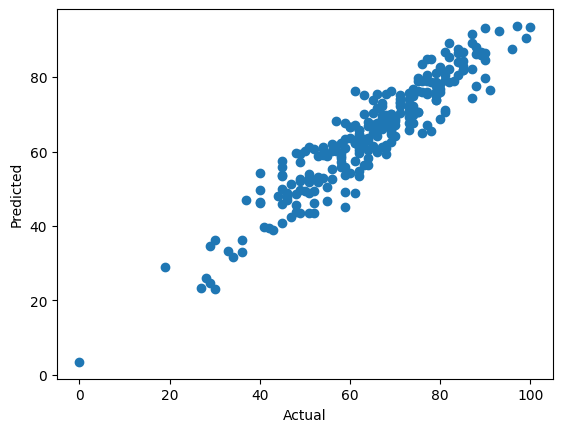

In [83]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [85]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_pred,'Difference':Y_test-Y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.415556,14.584444
737,53,58.835356,-5.835356
740,80,76.907370,3.092630
660,74,76.760032,-2.760032
411,84,87.454007,-3.454007
...,...,...,...
109,70,64.035129,5.964871
430,64,63.158496,0.841504
77,80,82.733853,-2.733853
84,42,39.387374,2.612626


In [86]:
pred_df.max()

Actual Value       100.000000
Predicted Value     93.727782
Difference          14.584444
dtype: float64

In [87]:
pred_df.min()

Actual Value        0.000000
Predicted Value     3.493288
Difference        -15.324159
dtype: float64

In [88]:
pred_df.mean()

Actual Value       64.548000
Predicted Value    64.595263
Difference         -0.047263
dtype: float64